In [ ]:
import tensorflow as tf

tf.keras.layers.Dense(10, activation = 'relu',
                      kernel_initializer = 'he_normal')

<Dense name=dense, built=False>

#Leaky ReLu

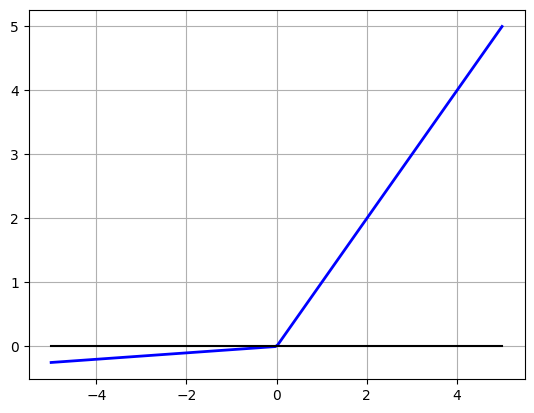

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(z, alpha = 0.01):
    return np.maximum(alpha * z,z)

z= np.linspace(-5,5, 200)

plt.plot(z,leaky_relu(z,0.05), 'b-',linewidth = 2)
plt.grid()
plt.plot([-5,5],[0,0],'k-')


In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope = 0.05)
tf.keras.layers.Dense(10, activation = leaky_relu,
                      kernel_initializer = 'he_normal')

<Dense name=dense_1, built=False>

In [ ]:
tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation = 'leaky_relu',
                          kernel_initializer = 'he_normal')
])

<Sequential name=sequential, built=False>

In [ ]:
tf.keras.Sequential([
    tf.keras.layers.Dense(30,kernel_initializer = 'he_normal'),
    tf.keras.layers.LeakyReLU(negative_slope = 0.05)
])

<Sequential name=sequential_1, built=False>

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid =X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test =X_train/255, X_valid/255,X_test/255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,  kernel_initializer = 'he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(100, activation = 'leaky_relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5,
          validation_data = (X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5170 - loss: 1.6710 - val_accuracy: 0.7342 - val_loss: 0.8816
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7389 - loss: 0.8385 - val_accuracy: 0.7766 - val_loss: 0.6981
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7812 - loss: 0.6935 - val_accuracy: 0.7950 - val_loss: 0.6224
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7999 - loss: 0.6236 - val_accuracy: 0.8060 - val_loss: 0.5833
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8109 - loss: 0.5805 - val_accuracy: 0.8162 - val_loss: 0.5460


#Elu

In [ ]:
tf.keras.layers.Dense(10, activation = 'elu',
                      kernel_initializer = 'he_normal')

<Dense name=dense_7, built=False>

#Selu

In [ ]:
dense = tf.keras.layers.Dense(50, activation = 'selu',
                             kernel_initializer = 'lecun_normal')

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())

for i in range(100):
    model.add(tf.keras.layers.Dense(100, activation = 'selu',
                                     kernel_initializer = 'lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax',
                                kernel_initializer= 'glorot_normal'))

In [ ]:
class_names = ["T-shirt/top",'Trouser', 'Pullover','Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
pixel_means = X_train.mean(axis = 0, keepdims = True)
pixel_stds =  X_train.std(axis = 0, keepdims = True)
X_train_scaled = (X_train - pixel_means)/pixel_stds
X_test_scaled = (X_test - pixel_means)/pixel_stds
X_valid_scaled = (X_valid - pixel_means)/ pixel_stds

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(), metrics =['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs = 5,validation_data = (X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.1618 - loss: 2.1899 - val_accuracy: 0.1044 - val_loss: 2.3170
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.1150 - loss: 2.3054 - val_accuracy: 0.1972 - val_loss: 2.1785
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.2515 - loss: 1.9039 - val_accuracy: 0.2022 - val_loss: 2.1392
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.3567 - loss: 1.6388 - val_accuracy: 0.4454 - val_loss: 1.4111
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.4142 - loss: 1.4930 - val_accuracy: 0.4352 - val_loss: 1.4082


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())

for i in range(100):
    model.add(tf.keras.layers.Dense(100, activation = 'relu',
                                    kernel_initializer = 'he_normal'))

model.add(tf.keras.layers.Dense(10, activation = 'softmax',
                                kernel_initializer = 'glorot_normal')
)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(), metrics =['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs = 5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.2029 - loss: 1.9202 - val_accuracy: 0.1342 - val_loss: 1.9533
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.3241 - loss: 1.5766 - val_accuracy: 0.2070 - val_loss: 1.9844
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.2830 - loss: 1.6858 - val_accuracy: 0.3460 - val_loss: 1.5977
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.4611 - loss: 1.2734 - val_accuracy: 0.5238 - val_loss: 1.1314
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5343 - loss: 1.0775 - val_accuracy: 0.6292 - val_loss: 0.9888


#Batch Normalization

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation = 'softmax',kernel_initializer = 'glorot_normal' )
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs = 2, validation_data = (X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5747 - loss: 1.3218 - val_accuracy: 0.7954 - val_loss: 0.5935
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7894 - loss: 0.6245 - val_accuracy: 0.8230 - val_loss: 0.5049


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,kernel_initializer = 'he_normal',use_bias = False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(100,kernel_initializer = 'he_normal',use_bias = False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs = 2, validation_data = (X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5313 - loss: 1.4699 - val_accuracy: 0.7658 - val_loss: 0.7441
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7583 - loss: 0.7620 - val_accuracy: 0.7972 - val_loss: 0.6126


In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue = 1.0)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer)

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipnorm = 1.0)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer)

#Reusing Pretarained Layers

In [ ]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X,y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] ==pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(8, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

model_A.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
    metrics = ['accuracy']
)

model_A.fit(X_train_A, y_train_A, epochs = 20,
            validation_data = (X_valid_A, y_valid_A))
model_A.save("my_model_A.keras")

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4992 - loss: 1.5478 - val_accuracy: 0.7806 - val_loss: 0.7596
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7929 - loss: 0.7019 - val_accuracy: 0.8290 - val_loss: 0.5567
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8313 - loss: 0.5420 - val_accuracy: 0.8488 - val_loss: 0.4765
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8530 - loss: 0.4699 - val_accuracy: 0.8596 - val_loss: 0.4297
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8671 - loss: 0.4253 - val_accuracy: 0.8689 - val_loss: 0.3985
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8747 - loss: 0.3944 - val_accuracy: 0.8769 - val_loss: 0.3761
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8789 - loss: 0.3715 - val_accuracy: 0.8812 - val_loss: 0.3590
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8835 - loss: 0.3538 -

In [ ]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(100, activation = 'relu',kernel_initializer = 'he_normal'),
    tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = 'glorot_normal')
])

model_B.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

history = model_B.fit(X_train_B, y_train_B, epochs = 20, validation_data = (X_valid_B, y_valid_B))

model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5699 - loss: 0.8223 - val_accuracy: 0.5143 - val_loss: 0.7732
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5699 - loss: 0.7384 - val_accuracy: 0.5134 - val_loss: 0.7092
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5680 - loss: 0.6844 - val_accuracy: 0.5262 - val_loss: 0.6655
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5793 - loss: 0.6466 - val_accuracy: 0.6063 - val_loss: 0.6331
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6507 - loss: 0.6178 - val_accuracy: 0.6904 - val_loss: 0.6076
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7326 - loss: 0.5940 - val_accuracy: 0.7745 - val_loss: 0.5863
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8063 - loss: 0.5732 - val_accuracy: 0.8131 - val_loss: 0.5677
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8485 - loss: 0.5545 - val_accuracy: 0.8368 - val_loss: 0.5511


[0.4260556101799011, 0.9315000176429749]

In [ ]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation ='sigmoid'))

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layers_trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model_B_on_A.compile(loss = 'binary_crossentropy', optimizer = optimizer,
                     metrics = ['accuracy'])

In [ ]:
model_B_on_A.fit(X_train_B, y_train_B, epochs = 4,
                 validation_data = (X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5584 - loss: 0.6622 - val_accuracy: 0.5796 - val_loss: 0.6731
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6468 - loss: 0.6460 - val_accuracy: 0.6301 - val_loss: 0.6566
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6977 - loss: 0.6321 - val_accuracy: 0.6677 - val_loss: 0.6422
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7152 - loss: 0.6195 - val_accuracy: 0.7013 - val_loss: 0.6293


In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                     metrics = ['accuracy'])
model_B_on_A.fit(X_train_B, y_train_B, epochs = 16, validation_data= (X_valid_B,y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7387 - loss: 0.6078 - val_accuracy: 0.7240 - val_loss: 0.6173
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7583 - loss: 0.5966 - val_accuracy: 0.7527 - val_loss: 0.6061
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7993 - loss: 0.5858 - val_accuracy: 0.7745 - val_loss: 0.5954
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8039 - loss: 0.5755 - val_accuracy: 0.7962 - val_loss: 0.5852
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8085 - loss: 0.5654 - val_accuracy: 0.8131 - val_loss: 0.5754
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8112 - loss: 0.5556 - val_accuracy: 0.8249 - val_loss: 0.5659
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8233 - loss: 0.5462 - val_accuracy: 0.8348 - val_loss: 0.5569
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8269 - loss: 0.5370 - val_accuracy: 0.8477 - val_loss: 0.5481


In [ ]:
def build_model(seed = 42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape = [28,28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation = 'relu',
                              kernel_initializer = 'he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation = 'relu',
                              kernel_initializer = 'he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation = 'relu',
                              kernel_initializer = 'he_normal'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer,
                  metrics = ['accuracy'])
    return model.fit(X_train,y_train, epochs = 10,
                     validation_data = (X_valid, y_valid))


#Momentum Optimization

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

In [ ]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7227 - loss: 0.8216 - val_accuracy: 0.8456 - val_loss: 0.4134
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8452 - loss: 0.4443 - val_accuracy: 0.8588 - val_loss: 0.3799
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8644 - loss: 0.3854 - val_accuracy: 0.8668 - val_loss: 0.3644
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8767 - loss: 0.3471 - val_accuracy: 0.8680 - val_loss: 0.3553
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8874 - loss: 0.3178 - val_accuracy: 0.8716 - val_loss: 0.3529
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8949 - loss: 0.2938 - val_accuracy: 0.8712 - val_loss: 0.3515
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9044 - loss: 0.2724 - val_accuracy: 0.8750 - val_loss: 0.3508
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9117 - loss: 0.25

#NAG Nesterov Accelerated Gradient

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9,
                                    nesterov = True)

#Adagrad

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001)

In [ ]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6113 - loss: 1.1813 - val_accuracy: 0.7934 - val_loss: 0.6073
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7793 - loss: 0.6463 - val_accuracy: 0.8122 - val_loss: 0.5337
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8006 - loss: 0.5782 - val_accuracy: 0.8226 - val_loss: 0.4999
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8122 - loss: 0.5416 - val_accuracy: 0.8290 - val_loss: 0.4790
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8199 - loss: 0.5168 - val_accuracy: 0.8318 - val_loss: 0.4643
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8257 - loss: 0.4983 - val_accuracy: 0.8378 - val_loss: 0.4531
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8305 - loss: 0.4834 - val_accuracy: 0.8408 - val_loss: 0.4441
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8348 - loss: 0.471

#RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7804 - loss: 0.6261 - val_accuracy: 0.8674 - val_loss: 0.3644
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8594 - loss: 0.3862 - val_accuracy: 0.8742 - val_loss: 0.3405
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8821 - loss: 0.3287 - val_accuracy: 0.8792 - val_loss: 0.3327
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8956 - loss: 0.2891 - val_accuracy: 0.8768 - val_loss: 0.3461
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9081 - loss: 0.2586 - val_accuracy: 0.8792 - val_loss: 0.3460
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9158 - loss: 0.2349 - val_accuracy: 0.8764 - val_loss: 0.3539
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9246 - loss: 0.2131 - val_accuracy: 0.8746 - val_loss: 0.3715
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9306 - loss: 0.19

#Adam optimizer

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9,
                                     beta_2 = 0.999)
hostory_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7752 - loss: 0.6414 - val_accuracy: 0.8630 - val_loss: 0.3667
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8584 - loss: 0.3880 - val_accuracy: 0.8686 - val_loss: 0.3499
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8774 - loss: 0.3353 - val_accuracy: 0.8714 - val_loss: 0.3462
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8904 - loss: 0.2971 - val_accuracy: 0.8762 - val_loss: 0.3422
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8998 - loss: 0.2683 - val_accuracy: 0.8760 - val_loss: 0.3532
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9117 - loss: 0.2391 - val_accuracy: 0.8784 - val_loss: 0.3602
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9191 - loss: 0.2184 - val_accuracy: 0.8772 - val_loss: 0.3741
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9252 - loss: 0.19

#Adamax optiimizer

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001, beta_1 = 0.9,
                                       beta_2 = 0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7596 - loss: 0.7124 - val_accuracy: 0.8484 - val_loss: 0.3965
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8554 - loss: 0.4073 - val_accuracy: 0.8648 - val_loss: 0.3656
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8763 - loss: 0.3438 - val_accuracy: 0.8688 - val_loss: 0.3502
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8914 - loss: 0.3020 - val_accuracy: 0.8712 - val_loss: 0.3477
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9036 - loss: 0.2690 - val_accuracy: 0.8728 - val_loss: 0.3515
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9153 - loss: 0.2403 - val_accuracy: 0.8710 - val_loss: 0.3587
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9250 - loss: 0.2150 - val_accuracy: 0.8732 - val_loss: 0.3675
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9351 - loss: 0.19

#Nadam Optimizer

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001, beta_1 = 0.9,
                                      beta_2 = 0.999)
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7727 - loss: 0.6552 - val_accuracy: 0.8598 - val_loss: 0.3641
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8588 - loss: 0.3875 - val_accuracy: 0.8722 - val_loss: 0.3428
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8780 - loss: 0.3332 - val_accuracy: 0.8708 - val_loss: 0.3463
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8913 - loss: 0.2969 - val_accuracy: 0.8736 - val_loss: 0.3465
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9014 - loss: 0.2661 - val_accuracy: 0.8732 - val_loss: 0.3552
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9136 - loss: 0.2369 - val_accuracy: 0.8746 - val_loss: 0.3641
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9237 - loss: 0.2112 - val_accuracy: 0.8672 - val_loss: 0.4117
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9296 - loss: 0.19

#AdamW optimization -> Adam Weight Decay

In [ ]:
optimizer = tf.keras.optimizers.AdamW(weight_decay = 1e-1,learning_rate = 0.001,
                                      beta_1 = 0.9,beta_2 = 0.999)
hstory_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7724 - loss: 0.6455 - val_accuracy: 0.8638 - val_loss: 0.3688
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8584 - loss: 0.3926 - val_accuracy: 0.8684 - val_loss: 0.3478
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8733 - loss: 0.3502 - val_accuracy: 0.8742 - val_loss: 0.3418
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8835 - loss: 0.3228 - val_accuracy: 0.8718 - val_loss: 0.3440
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8886 - loss: 0.3019 - val_accuracy: 0.8640 - val_loss: 0.3596
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8961 - loss: 0.2887 - val_accuracy: 0.8616 - val_loss: 0.3680
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9013 - loss: 0.2740 - val_accuracy: 0.8716 - val_loss: 0.3535
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9029 - loss: 0.266

#Learning Rate Schedule

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10_000,
    decay_rate = 1.0,
    staircase =False
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [ ]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7326 - loss: 0.7777 - val_accuracy: 0.8428 - val_loss: 0.4241
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8417 - loss: 0.4472 - val_accuracy: 0.8554 - val_loss: 0.3899
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8616 - loss: 0.3924 - val_accuracy: 0.8610 - val_loss: 0.3734
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8727 - loss: 0.3597 - val_accuracy: 0.8644 - val_loss: 0.3649
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8817 - loss: 0.3355 - val_accuracy: 0.8662 - val_loss: 0.3598
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8870 - loss: 0.3162 - val_accuracy: 0.8678 - val_loss: 0.3560
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8942 - loss: 0.2999 - val_accuracy: 0.8698 - val_loss: 0.3538
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8998 - loss: 0.2858

#Exponential Scheduling

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 20_000,
    decay_rate = 0.1,
    staircase = 0.1

)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [ ]:
history_exponential = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7258 - loss: 0.8004 - val_accuracy: 0.8450 - val_loss: 0.4213
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8427 - loss: 0.4417 - val_accuracy: 0.8576 - val_loss: 0.3885
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8627 - loss: 0.3845 - val_accuracy: 0.8618 - val_loss: 0.3764
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8752 - loss: 0.3475 - val_accuracy: 0.8664 - val_loss: 0.3706
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8870 - loss: 0.3190 - val_accuracy: 0.8658 - val_loss: 0.3671
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8969 - loss: 0.2950 - val_accuracy: 0.8648 - val_loss: 0.3682
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9041 - loss: 0.2739 - val_accuracy: 0.8662 - val_loss: 0.3676
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9114 - loss: 0.255

#Piecewise Constant Scheduling

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [50_000, 80_000],
    values = [0.01, 0.005,0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)
history_piecewise= build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7296 - loss: 0.7793 - val_accuracy: 0.8478 - val_loss: 0.4203
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8412 - loss: 0.4462 - val_accuracy: 0.8582 - val_loss: 0.3861
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8639 - loss: 0.3857 - val_accuracy: 0.8630 - val_loss: 0.3735
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8766 - loss: 0.3483 - val_accuracy: 0.8666 - val_loss: 0.3653
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8871 - loss: 0.3195 - val_accuracy: 0.8696 - val_loss: 0.3611
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8963 - loss: 0.2951 - val_accuracy: 0.8698 - val_loss: 0.3612
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9038 - loss: 0.2741 - val_accuracy: 0.8724 - val_loss: 0.3608
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9107 - loss: 0.2553

#Avoiding Overfitting Through Regularization

In [ ]:
layer = tf.keras.layers.Dense(100, activation = 'elu',
                              kernel_initializer = 'he_normal',
                              kernel_regularizer = tf.keras.regularizers.l2(0.01))

In [ ]:
tf.random.set_seed(42)

In [ ]:
from functools import partial

RegularizedDense = partial(
    tf.keras.layers.Dense,
    activation = 'relu',
    kernel_initializer = 'he_normal',
    kernel_regularizer = tf.keras.regularizers.l2(0.01)
)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation = 'softmax',kernel_initializer = 'glorot_normal')
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9, nesterov = True)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"] )

In [ ]:
model.fit(X_train, y_train, epochs = 2, validation_data = (X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6764 - loss: 8.1055 - val_accuracy: 0.8162 - val_loss: 4.9173
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8141 - loss: 4.3197 - val_accuracy: 0.8218 - val_loss: 2.8935


#Dropout

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

In [ ]:
model tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(rate= 0.2),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

SyntaxError: invalid syntax (<ipython-input-63-4c076d316313>, line 1)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001,
                                                  momentum = 0.9),
              metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 10,
          validation_data = (X_valid, y_valid))

In [ ]:
model.evaluate(X_train,y_train)

In [ ]:
model.evaluate(X_test, y_test)

#MC(Monte Carlo) dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas = np.stack([model(X_test, training = True)
for _ in range(100)])

In [ ]:
y_probas.shape

In [ ]:
y_proba = np.mean(y_probas, axis = 0)

In [ ]:
model.predict(X_test[:1]).round(3)

In [ ]:
y_proba[0].round(3)

In [ ]:
class_names

In [ ]:
y_std = y_probas.std(axis = 0)
y_std[0].round(3)

In [ ]:
y_proba.shape

In [ ]:
y_pred = np.argmax(y_proba, axis = 1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

In [ ]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training = None):
        return super().call(inputs, training = True)
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())
mc_model.summary()

In [ ]:
for layer in model.layers:
    print(layer.name, isinstance(layer, tf.keras.layers.Dropout))

In [ ]:
dense = tf.keras.layers.Dense(100, activation = 'relu',
                              kernel_initializer = 'he_normal',
                              kernel_constraint = tf.keras.constraints.max_norm(1.))


MaxNormDense = partial(tf.keras.layers.Dense,
                       activation = 'relu', kernel_initializer = 'he_normal',
                       kernel_constraint = tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    MaxNormDense
])
